* 이 문서는 python3.6을 기반으로 작성되었습니다.

# Importing Data & Library

In [1]:
import os
os.chdir("/Users/yeeun/Documents/dev/project/TRIT/Trit_tmall/DATA")
os.listdir("/Users/yeeun/Documents/dev/project/TRIT/Trit_tmall/DATA")

['sp_userinfo.csv',
 '.DS_Store',
 'original',
 'sp_userlog.csv',
 'user_log_format1.csv',
 'test_format2.csv',
 'user_info_format1.csv',
 'test_format1.csv',
 'train_format2.csv',
 'train_format1.csv',
 'sp_tr2.csv',
 'sp_tr1.csv']

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

% matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
user_log = pd.read_csv("user_log_format1.csv")

In [4]:
spuser_log = pd.read_csv("sp_userlog.csv")

In [5]:
user_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


In [6]:
spuser_log.head()

,Unnamed: 0,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,16397838,273000,208914,301,4052,4968.0,914,0
1,50735638,393802,669467,1238,141,3614.0,819,0
2,54230982,50332,602979,1095,2171,1522.0,810,0
3,36522435,166793,642357,389,4173,5376.0,1111,0
4,31961787,300603,890817,1181,158,99.0,1111,0


In [7]:
merchant = user_log[['seller_id', 'item_id', 'cat_id', 'brand_id']]

In [8]:
merchant.head()

,seller_id,item_id,cat_id,brand_id
0,2882,323294,833,2661.0
1,2882,844400,1271,2661.0
2,2882,575153,1271,2661.0
3,2882,996875,1271,2661.0
4,1253,1086186,1271,1049.0


In [9]:
sp_merchant = spuser_log[['seller_id', 'item_id', 'cat_id', 'brand_id']]

In [10]:
sp_merchant.head()

,seller_id,item_id,cat_id,brand_id
0,4052,208914,301,4968.0
1,141,669467,1238,3614.0
2,2171,602979,1095,1522.0
3,4173,642357,389,5376.0
4,158,890817,1181,99.0


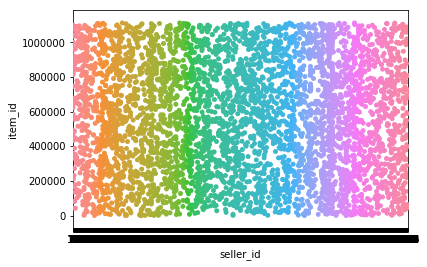

In [11]:
sns.stripplot(x="seller_id", y="item_id", data=sp_merchant);

전체 데이터는 너무 많았기 때문에 일단은 5000개 나누어놨던 것으로 그림을 그려봄. 그렇지만 그림을 그려봐도 별로 얻을 수 있는 데이터는 없는 것 같음.

In [12]:
merchant.is_copy = None

In [13]:
merchant['seller_count'] = merchant.groupby("seller_id")['seller_id'].transform('count')
merchant['cat_count'] = merchant.groupby("cat_id")['cat_id'].transform('count')
merchant['brand_count'] = merchant.groupby("brand_id")['brand_id'].transform('count')
merchant['item_count'] = merchant.groupby("item_id")['item_id'].transform('count')

In [14]:
merchant.head()

,seller_id,item_id,cat_id,brand_id,seller_count,cat_count,brand_count,item_count
0,2882,323294,833,2661.0,9416,100659,9428.0,14
1,2882,844400,1271,2661.0,9416,660025,9428.0,3
2,2882,575153,1271,2661.0,9416,660025,9428.0,11
3,2882,996875,1271,2661.0,9416,660025,9428.0,6
4,1253,1086186,1271,1049.0,51919,660025,8652.0,115


In [15]:
merchant.dtypes

seller_id         int64
item_id           int64
cat_id            int64
brand_id        float64
seller_count      int64
cat_count         int64
brand_count     float64
item_count        int64
dtype: object